https://towardsdatascience.com/an-exploratory-data-analysis-on-lower-back-pain-6283d0b0123

In [1]:
#sdasdasd
# Importing the libraries
import numpy as np
import pandas as pd
import math
import os # accessing directory structure
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('./Dataset_spine.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Dataset_spine.csv'
nRow, nCol = df1.shape

print( nRow)
print( nCol)


310
14


In [3]:
df=df1
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [4]:
df.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)
df.head(4)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,drop
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN


In [5]:
del df['drop']
df.head(4)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal


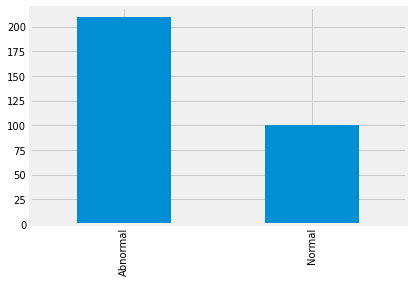

In [6]:
df["class"].value_counts().sort_index().plot.bar()





In [7]:
df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


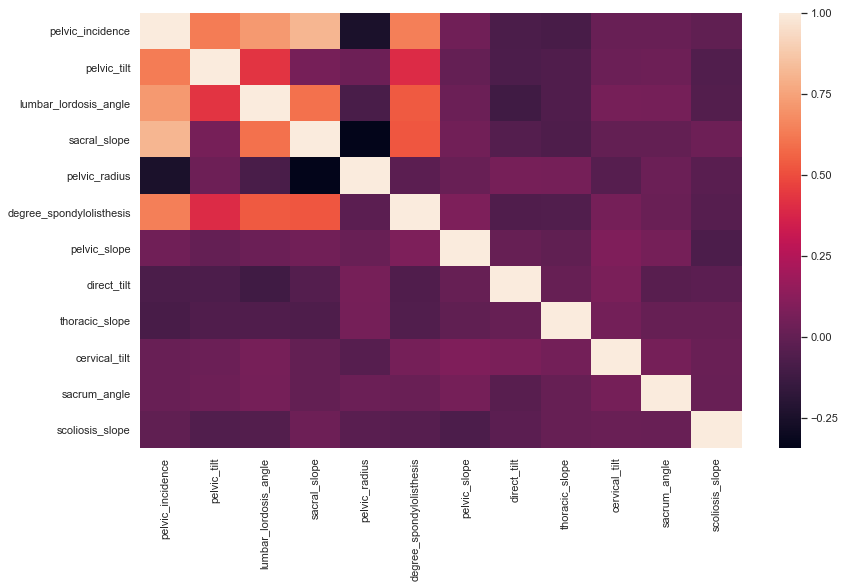

In [8]:
#!pip install seaborn
import seaborn as sns
sns.set()


plt.subplots(figsize=(12,8))
sns.heatmap(df.corr())

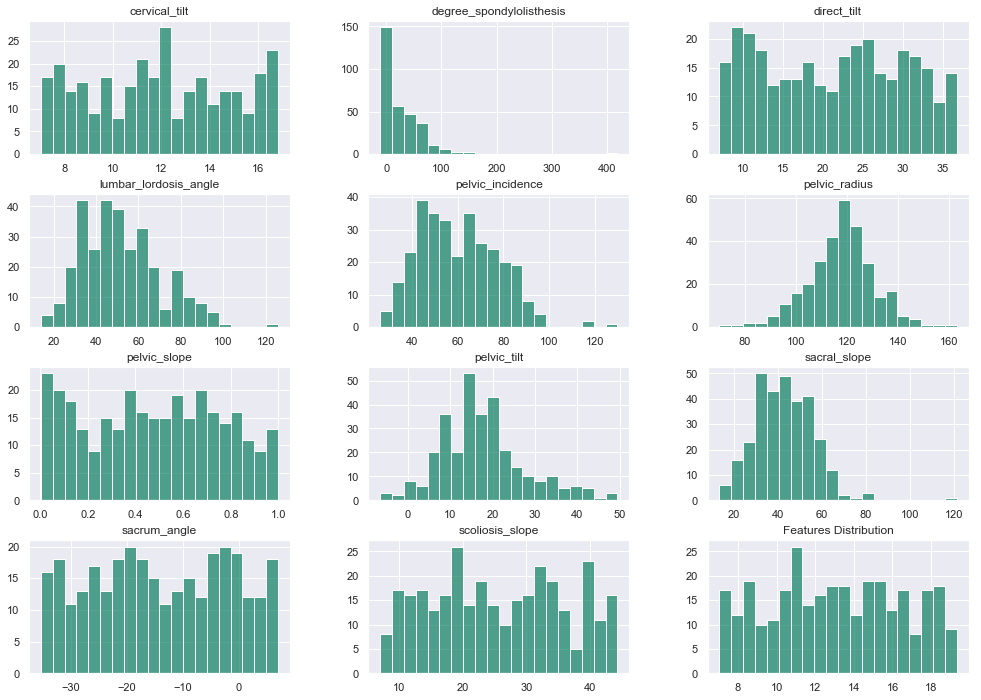

In [11]:
df.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

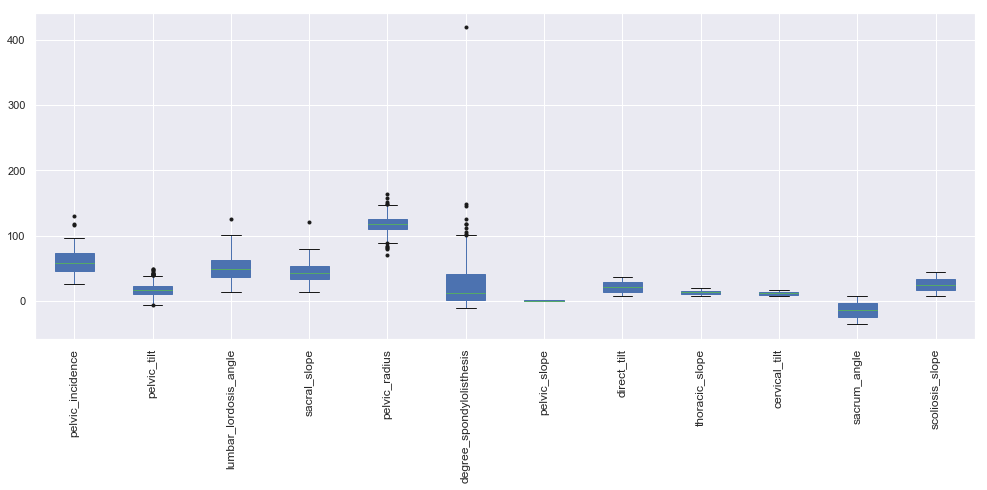

In [21]:
plt.subplots(figsize=(15,6))
df.boxplot(patch_artist=True, sym=".k")
plt.xticks(rotation=90)

In [27]:
#!pip install sklearn
#!pip install xgboost
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
X = df.iloc[:, :-1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711


In [31]:

label = df["class"]
encoder = LabelEncoder()
label = encoder.fit_transform(label)

# now the fun stuff 

In [33]:
X = scaled_df
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
clf_gnb = GaussianNB()
pred_gnb = clf_gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_gnb, y_test)
# Out []: 0.8085106382978723


0.8085106382978723

In [34]:
clf_svc = SVC(kernel="linear")
pred_svc = clf_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_svc, y_test)
# Out []: 0.7872340425531915


0.7021276595744681

In [35]:
clf_xgb =  XGBClassifier()
pred_xgb = clf_xgb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_xgb, y_test)
# Out []: 0.8297872340425532

0.8085106382978723

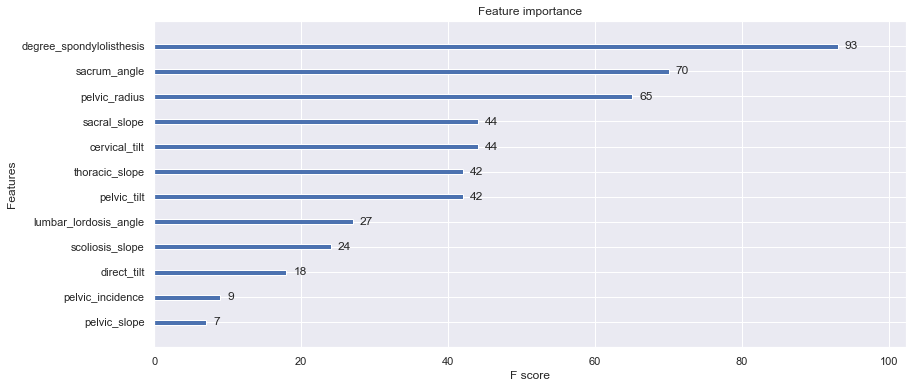

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_importance(clf_xgb, ax=ax)

## Marginal plot
### A marginal plot allows us to study the relationship between 2 numeric variables. The central chart displays their correlation.

### Lets visualize the relationship between degree_spondylolisthesis and class:

C:\Users\kali\Anaconda3\envs\idp3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


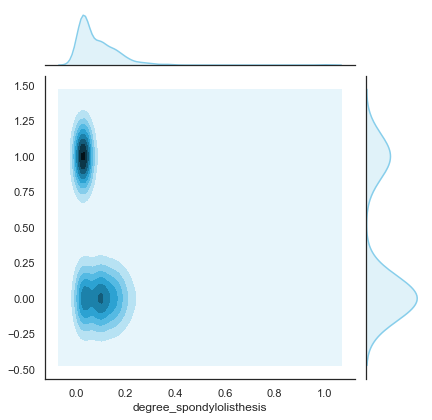

In [41]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=X["degree_spondylolisthesis"], y=label, kind='kde', color="skyblue")

----------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------

https://towardsdatascience.com/an-exploratory-data-analysis-on-lower-back-pain-6283d0b0123

In [56]:

data = pd.read_csv('./Dataset_spine.csv', delimiter=',', nrows = nRowsRead)
data.drop(['drop'],axis=1,inplace=True)
data.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [57]:
data.Class_att = [1 if each == "Abnormal" else 0 for each in data.Class_att]
data.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [58]:
#assign Class_att column as y attribute
y = data.Class_att.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Class_att"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [59]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =42)

In [60]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [63]:
#parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01) #first initialize w values to 0.01
    b = 0.0 #first initialize bias value to 0.0
    return w,b

#sigmoid function fits the z value between 0 and 1
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [64]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    
    y_head = sigmoid(np.dot(w.T,x_train) + b)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost,gradients

In [65]:
def update_weight_and_bias(w,b,x_train,y_train,learning_rate,iteration_num) :
    cost_list = []
    index = []
    
    #for each iteration, update w and b values
    for i in range(iteration_num):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        
        cost_list.append(cost)
        index.append(i)

    parameters = {"weight": w,"bias": b}
    
    print("iteration_num:",iteration_num)
    print("cost:",cost)

    #plot cost versus iteration graph to see how the cost changes over number of iterations
    plt.plot(index,cost_list)
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [67]:
def predict(w,b,x_test):
    z = np.dot(w.T,x_test) + b
    y_predicted_head = sigmoid(z)
    
    #create new array with the same size of x_test and fill with 0's.
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_predicted_head.shape[1]):
        if y_predicted_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [66]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,iteration_num):
    dimension = x_train.shape[0]#For our dataset, dimension is 248
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients = update_weight_and_bias(w,b,x_train,y_train,learning_rate,iteration_num)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    # Print test Accuracy
    print("manuel test accuracy:",(100 - np.mean(np.abs(y_prediction - y_test))*100)/100)

iteration_num: 10
cost: 0.6043738678506019


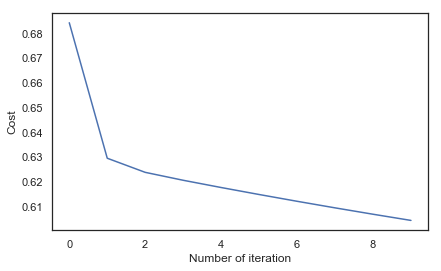

manuel test accuracy: 0.7096774193548387


In [68]:
logistic_regression(x_train,y_train,x_test,y_test,1,10)


C:\Users\kali\Anaconda3\envs\idp3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
C:\Users\kali\Anaconda3\envs\idp3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in multiply


iteration_num: 5000
cost: nan


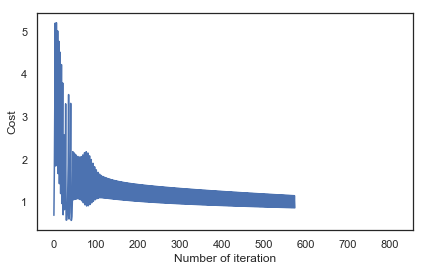

manuel test accuracy: 0.8548387096774194


In [85]:
logistic_regression(x_train,y_train,x_test,y_test,10,5000)

C:\Users\kali\Anaconda3\envs\idp3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log
C:\Users\kali\Anaconda3\envs\idp3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in multiply


iteration_num: 5000
cost: nan


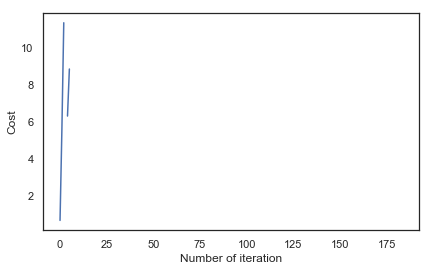

manuel test accuracy: 0.8709677419354839


In [94]:
logistic_regression(x_train,y_train,x_test,y_test,34,5000)

iteration_num: 200
cost: 0.4579105095578738


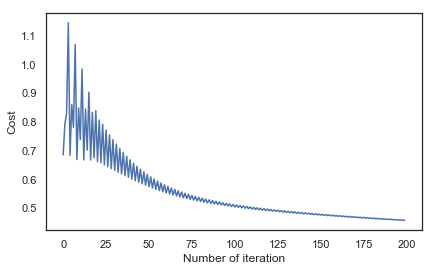

manuel test accuracy: 0.8064516129032258


In [95]:
logistic_regression(x_train,y_train,x_test,y_test,4,200)

or....

In [107]:
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
lr_model = LogisticRegression()

lr_model.fit(x_train.T,y_train.T)

print("sklearn test accuracy:", lr_model.score(x_test.T,y_test.T))

sklearn test accuracy: 0.7258064516129032


C:\Users\kali\Anaconda3\envs\idp3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
lreg_model = LinearRegression()

lreg_model.fit(x_train.T,y_train.T)

print("sklearn test accuracy:", lreg_model.score(x_test.T,y_test.T))

sklearn test accuracy: 0.3238490124066914


In [108]:
SGD = SGDClassifier()

SGD.fit(x_train.T,y_train.T)

print("sklearn test accuracy:", SGD.score(x_test.T,y_test.T))

sklearn test accuracy: 0.8064516129032258


In [109]:
from sklearn.linear_model import SGDRegressor
SGD_R = SGDRegressor()

SGD_R.fit(x_train.T,y_train.T)

print("sklearn test accuracy:", SGD_R.score(x_test.T,y_test.T))

sklearn test accuracy: 0.092290310649213
